## EN3160 - Assignment 1 on Intensity Transformations and Neighborhood Filtering

### Kodikara U. S. S. 210293K

#### Question 01

256


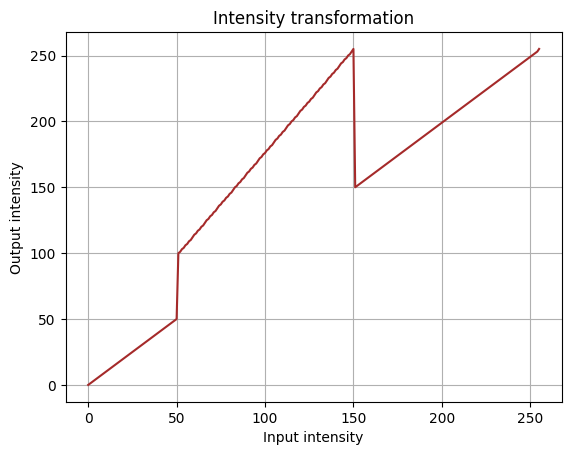

In [24]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Define each segment
t1 = np.linspace(0, 50, 51).astype('uint8')     # 50 samples from 0 to 50
t2 = np.linspace(50, 100, 0).astype('uint8')    # 50 samples at a constant value 50
t3 = np.linspace(100, 255, 100).astype('uint8')  # 100 samples from 50 to 255
t4 = np.linspace(255, 150, 0).astype('uint8') # 105 samples from 255 to 150 (decreasing)
t5 = np.linspace(150, 255, 105).astype('uint8') # 105 samples from 150 to 255

# Concatenate all segments to form the complete transformation
transform = np.concatenate((t1, t2, t3, t4, t5), axis=0).astype('uint8')

# Check the length of the final transformation
print(len(transform))  

# Plot the transformation
plt.plot(transform, color='brown')
plt.xlabel('Input intensity')
plt.ylabel('Output intensity')
plt.title('Intensity transformation')
plt.grid(True)

# Show the plot
plt.show()


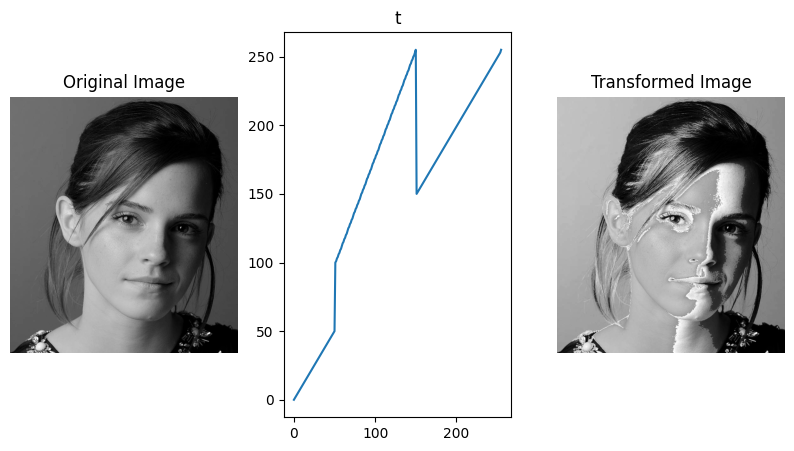

In [26]:
f= cv.imread('a1images\emma.jpg', cv.IMREAD_GRAYSCALE) # Read the image

assert f is not None, "Image not found"  # Check if the image is loaded
g = cv.LUT(f, transform) # Apply the transformation to the image

fig, ax = plt.subplots(1, 3, figsize=(10, 5)) # Create a figure with 3 subplots
ax[0].imshow(f, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].plot(transform)
ax[1].set_title('t')
ax[2].imshow(g, cmap='gray')
ax[2].set_title('Transformed Image')   
ax[2].axis('off')
plt.show()

#### Question 02

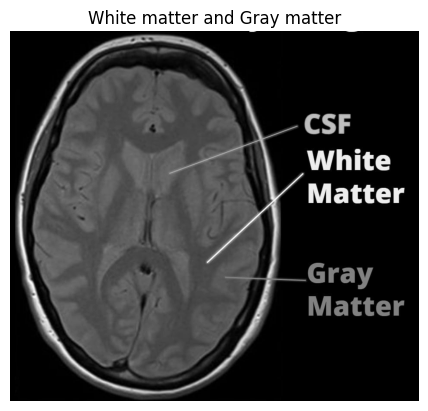

In [35]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

brain_proton_img = cv.imread("a1images/ref_brain.png", cv.IMREAD_GRAYSCALE)

# Display the image
plt.imshow(brain_proton_img, cmap='gray')
plt.title("White matter and Gray matter")
plt.axis('off')
plt.show()

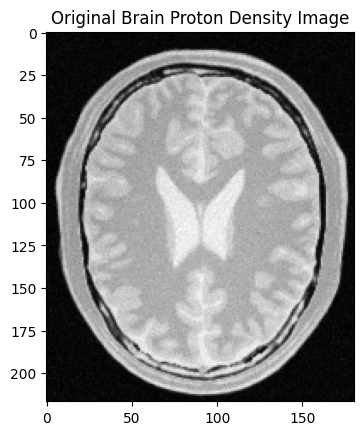

(217, 181)

In [38]:
# Load the brain proton density image
brain_proton_img = cv.imread("a1images/brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)

# Display the image
plt.imshow(brain_proton_img, cmap='gray')
plt.title("Original Brain Proton Density Image")
plt.show()

# Display image shape
brain_proton_img.shape

White Matter Intensity: 177
Gray Matter Intensity: 214


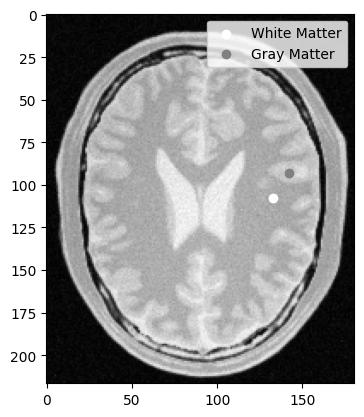

In [43]:
white_matter_point = 133, 108
gray_matter_point = 142, 93

# Show the points in the brain proton density image
plt.imshow(brain_proton_img, cmap="gray")
plt.scatter(white_matter_point[0], white_matter_point[1], color='white', label='White Matter')
plt.scatter(gray_matter_point[0], gray_matter_point[1], color='gray', label='Gray Matter')
plt.legend()

# Get pixel values
white_matter_intensity = brain_proton_img[white_matter_point]
gray_matter_intensity = brain_proton_img[gray_matter_point]

# Print pixel values
print(f"White Matter Intensity: {white_matter_intensity}")
print(f"Gray Matter Intensity: {gray_matter_intensity}")

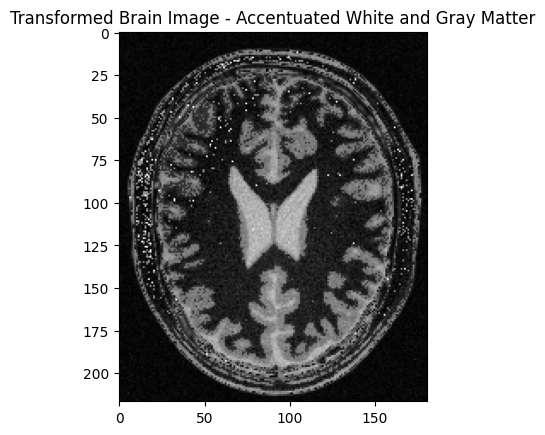

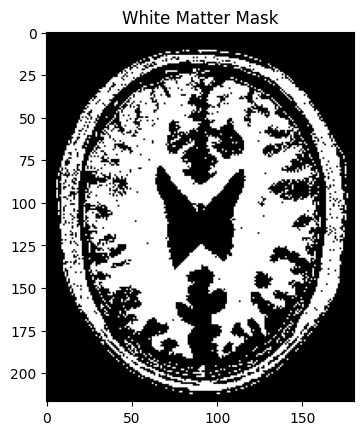

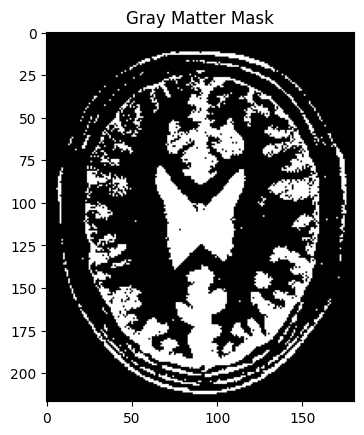

In [46]:
import numpy as np

# Copying the image to avoid modifying the original image
transformed_image = np.copy(brain_proton_img)

# Apply transformation for white matter (190 <= pixel <= 250) # white matter is brighter than gray
gray_matter_mask = (brain_proton_img >= 190) & (brain_proton_img <= 250)
transformed_image[gray_matter_mask] = 1.75 * brain_proton_img[gray_matter_mask] + 30

# Apply transformation for gray matter (150 <= pixel <= 189) # gray matter is darker than white
white_matter_mask = (brain_proton_img >= 150) & (brain_proton_img <= 189)
transformed_image[white_matter_mask] = 1.55 * brain_proton_img[white_matter_mask] + 22.5

# Display the transformed image
plt.imshow(transformed_brain_img, cmap='gray')
plt.title("Transformed Brain Image - Accentuated White and Gray Matter")
plt.show()

plt.imshow(white_matter_mask, cmap='gray')
plt.title("White Matter Mask")
plt.show()

plt.imshow(gray_matter_mask, cmap='gray')
plt.title("Gray Matter Mask")
plt.show()

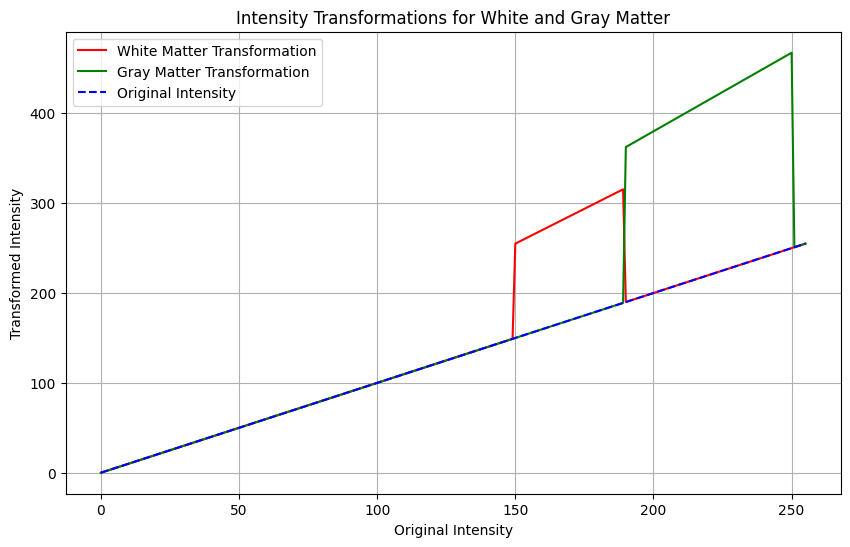

In [48]:
# Plot intensity transformation curves
x_vals = np.arange(0, 256)  # Intensity range (0-255)
gray_matter_transformed = np.array([1.75 * x + 30 if 190 <= x <= 250 else x for x in x_vals])
white_matter_transformed = np.array([1.55 * x + 22.5 if 150 <= x <= 189 else x for x in x_vals])

# Plot the intensity transformations
plt.figure(figsize=(10, 6))
plt.plot(x_vals, white_matter_transformed, label='White Matter Transformation', color='red')
plt.plot(x_vals, gray_matter_transformed, label='Gray Matter Transformation', color='green')
plt.plot(x_vals, x_vals, label='Original Intensity', linestyle='--', color='blue')  # Identity line
plt.title('Intensity Transformations for White and Gray Matter')
plt.xlabel('Original Intensity')
plt.ylabel('Transformed Intensity')
plt.legend()
plt.grid(True)
plt.show()

#### Question 03

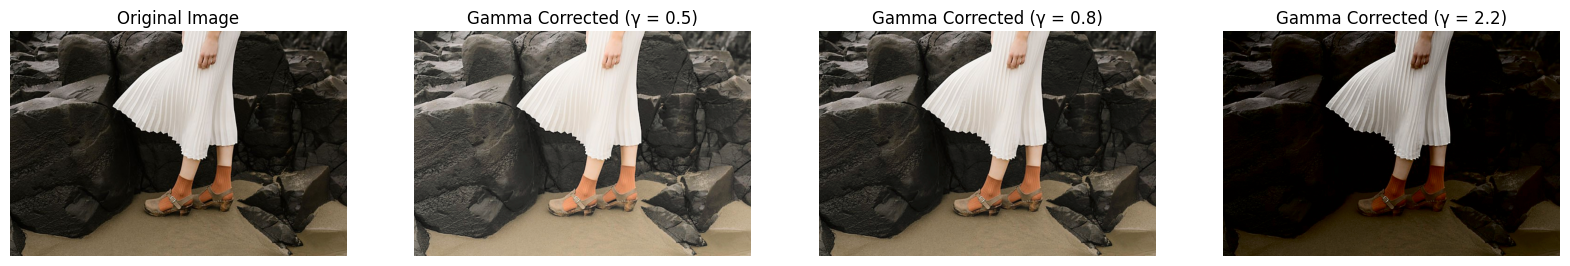

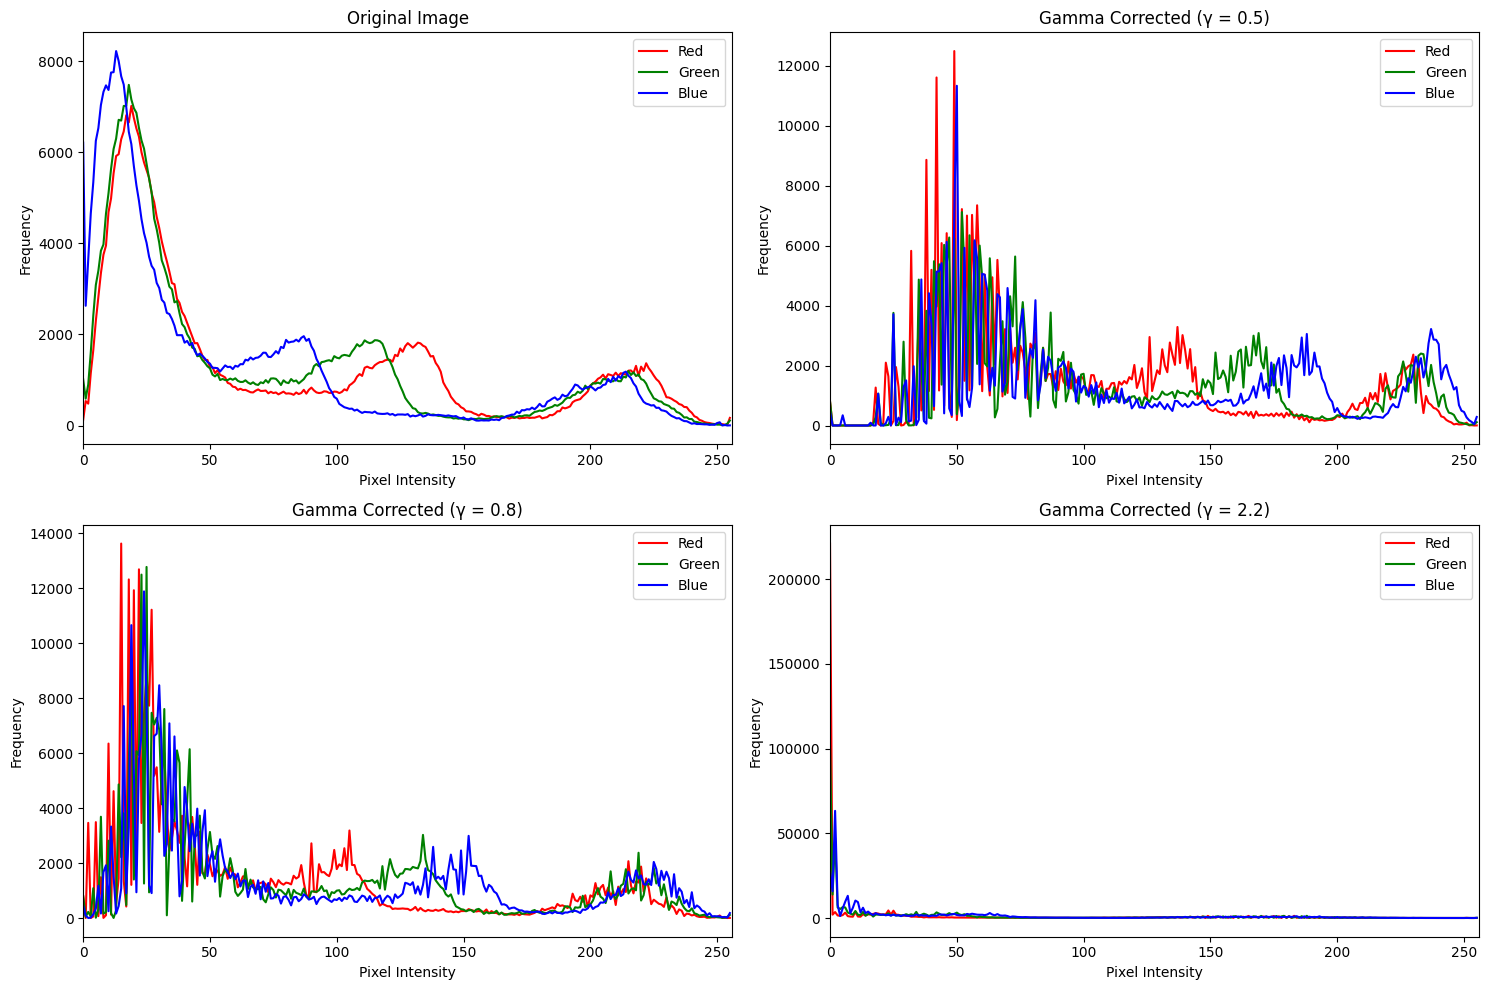

In [57]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image
bgr_img = cv2.imread('a1images/highlights_and_shadows.jpg', cv2.IMREAD_COLOR)
assert bgr_img is not None, "Image not found."

# Convert BGR image to LAB color space
lab_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2Lab)

# Split into L, A, and B channels
L, A, B = cv2.split(lab_img)

# Normalize the L channel to [0, 1]
L_normalized = L / 255.0

# Define gamma values
gamma_values = [0.5, 0.8, 2.2]
corrected_images = []

# Apply gamma correction for each gamma value
for gamma in gamma_values:
    L_gamma_corrected = np.power(L_normalized, gamma)
    L_gamma_corrected = np.uint8(L_gamma_corrected * 255)
    
    # Merge the corrected L channel with A and B channels
    lab_gamma_corrected = cv2.merge((L_gamma_corrected, A, B))
    gamma_corrected_img = cv2.cvtColor(lab_gamma_corrected, cv2.COLOR_Lab2BGR)
    
    corrected_images.append(gamma_corrected_img)

# Function to plot histograms for each RGB channel
def plot_histograms(images, titles):
    colors = ('r', 'g', 'b')
    plt.figure(figsize=(15, 10))

    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(2, 2, i + 1)
        for j, color in enumerate(colors):
            hist = cv2.calcHist([img], [j], None, [256], [0, 256])
            plt.plot(hist, color=color)
        plt.title(title)
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')
        plt.xlim([0, 256])
        plt.legend(['Red', 'Green', 'Blue'])

    plt.tight_layout()
    plt.show()

# Original image histogram
original_image_rgb = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
images_to_plot = [original_image_rgb] + corrected_images
titles = ['Original Image', 'Gamma Corrected (γ = 0.5)', 'Gamma Corrected (γ = 0.8)', 'Gamma Corrected (γ = 2.2)']

# Display the images
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

# Plot original and gamma corrected images
axs[0].set_title("Original Image")
axs[0].imshow(original_image_rgb)
axs[0].axis('off')

for i, (img, gamma) in enumerate(zip(corrected_images, gamma_values)):
    axs[i + 1].set_title(f"Gamma Corrected (γ = {gamma})")
    axs[i + 1].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[i + 1].axis('off')

plt.show()

# Plot histograms for original and corrected images
plot_histograms(images_to_plot, titles)


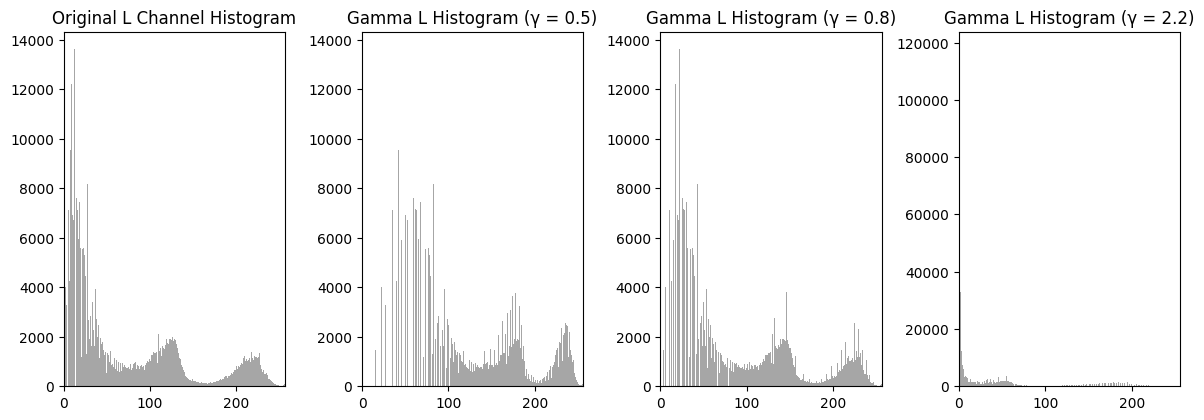

In [58]:
# Plot histograms for original and gamma-corrected L channels
plt.figure(figsize=(12, 8))

# Original L channel histogram
plt.subplot(2, 4, 1)
plt.hist(L.ravel(), bins=256, range=[0, 256], color='gray', alpha=0.7)
plt.title("Original L Channel Histogram")
plt.xlim([0, 256])

# Gamma corrected L channel histograms
for i, gamma in enumerate(gamma_values):
    plt.subplot(2, 4, i + 2)
    plt.hist(corrected_L_images[i].ravel(), bins=256, range=[0, 256], color='gray', alpha=0.7)
    plt.title(f"Gamma L Histogram (γ = {gamma})")
    plt.xlim([0, 256])

plt.tight_layout()
plt.show()